In [50]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from train import AutoencodingWorldModel, get_dataloaders, preprocess, postprocess, device, to_np
from distshift_dataset import UniqueDistshiftDataset

# Load Data

In [84]:
world_model = AutoencodingWorldModel(.001, hidden_layers=[32, 64, 64])
world_model.load_state_dict(torch.load(f"data/models/autoencoding.ckpt"))
world_model = world_model.to(device)

In [105]:
train_dataset = UniqueDistshiftDataset("distshift-v0")
test_dataset = UniqueDistshiftDataset("distshift-v1")

# Plotting Functions

In [91]:
np_to_torch = lambda np_array: torch.from_numpy(np_array).float().unsqueeze(0)
transition_to_torch = lambda s, a, r, t, ns: preprocess(np_to_torch(s), np_to_torch(a), torch.tensor([r]), torch.tensor([t]), np_to_torch(ns))

In [68]:
def plot_transition(state, action, next_state):
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(state)
    axes[0].set_title(f"Action: {action}")
    axes[1].imshow(next_state)
    plt.show()

In [103]:
def plot_predicted_transitions(dataset, transition_idx):
    s, a, r, t, ns = dataset[transition_idx]
    print('true transition')
    plot_transition(s.transpose((1, 2, 0)), a, ns.transpose((1, 2, 0)))
    print('\npredicted transition')
    s, a, r, t, ns = transition_to_torch(s, a, r, t, ns)
    predictions = world_model(s, a)
    predicted_next_state = postprocess(to_np(predictions["next_state"].squeeze(0)))
    plot_transition(postprocess(to_np(s.squeeze(0))), to_np(a.squeeze(0)), predicted_next_state)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


true transition


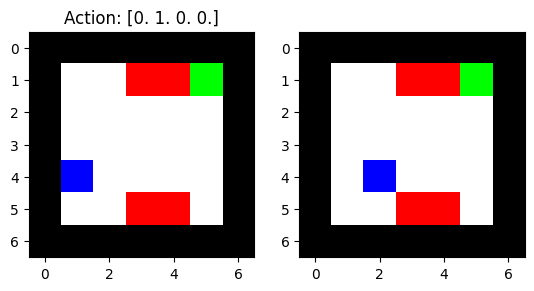


predicted transition


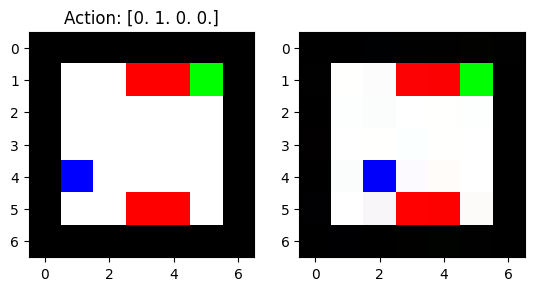

In [104]:
plot_predicted_transitions(train_dataset, 49)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


true transition


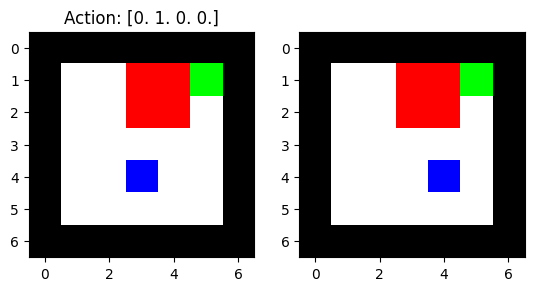


predicted transition


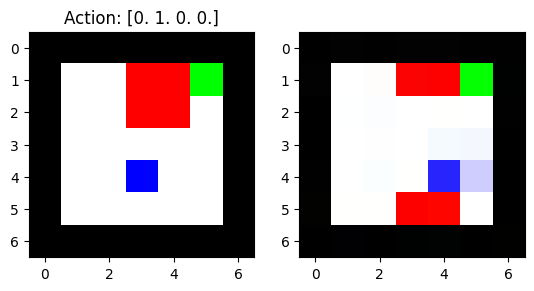

In [106]:
plot_predicted_transitions(test_dataset, 49)